# UNet-WD案件におけるデータの前処理に関するコード

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from sklearn.preprocessing import MinMaxScaler

In [2]:
bidet_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_Bidet.MYD.csv', sep=',')
bidet_df.columns = ['Time', 'bidet_flow']

# dishwasher_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_Dishwasher30.MYD.csv', sep='\\s+')
# dishwasher_df.columns = ['Time', 'dishwasher_flow', 'dishwasher_endtime']

kitchenfaucet_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_Kitchenfaucet.MYD.csv', sep=',')
kitchenfaucet_df.columns = ['Time', 'kitchenfaucet_flow']

shower_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_Shower.MYD.csv', sep='\\s+',header=None)
shower_df.columns = ['Time', 'shower_flow']
# display(shower_df.head())

washbasin_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_Washbasin.MYD.csv', sep='\\s+', header=None)
washbasin_df.columns = ['Time', 'washbasin_flow']
# display(washbasin_df.head())

# washingmachine_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_Washingmachine.MYD.csv', sep='\\s+', header=None)
# washingmachine_df.columns = ['Time', 'washingmachine_low']
# # display(washingmachine_df.head())

# wholehouse_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed_WholeHouse.MYD.csv', sep='\\s+', header=None)
# wholehouse_df.columns = ['Time', 'wholehouse_flow']
# # display(wholehouse_df.head())

# toilet_df = pd.read_csv('/Users/tomokitakata/Desktop/Tarantula/Water Disaggregation/WEUSEDTO-Data/Dataset/feed.Toilet.csv', sep='\\s+')
# toilet_df.columns = ['Time', 'toilet_flow', 'toilet_endtime']
# # display(toilet_df.head())

In [3]:
# Time列を基準にデータフレームをマージ
# 
merged_df = bidet_df.merge(kitchenfaucet_df, on='Time', how='outer') \
                    .merge(shower_df, on='Time', how='outer') \
                    .merge(washbasin_df, on='Time', how='outer') \

# マージしたデータフレームを表示
display(merged_df.head(10))

merged_df = merged_df.iloc[1:, :] #最初の秒数0のデータはエラー？なので削除
starttime = merged_df.iloc[0,0] # 開始時間を取得
merged_df['Time'] -= starttime # 開始時間を引いて経過時間とする。

,Time,bidet_flow,kitchenfaucet_flow,shower_flow,washbasin_flow
0,0,NaN,NaN,NaN,0.0
1,1550048169,NaN,NaN,NaN,0.0
2,1550048311,NaN,NaN,NaN,123.0
3,1550048312,NaN,NaN,NaN,54.0
4,1550056694,NaN,NaN,90.0,NaN
5,1550056695,NaN,NaN,139.0,NaN
6,1550056697,NaN,NaN,65.0,NaN
7,1550056698,NaN,NaN,2.0,NaN
8,1550056700,NaN,NaN,2.0,NaN
9,1550057001,NaN,NaN,0.0,NaN


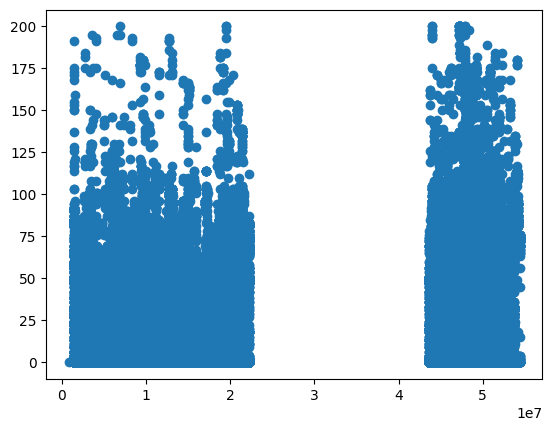

In [4]:
import matplotlib.pyplot as plt
plt.scatter(merged_df.Time, merged_df.kitchenfaucet_flow)
plt.show()

In [5]:
merged_df.fillna(0, inplace=True) # 欠損値処理
merged_df.sort_values(by='Time', ascending=True) #Timeの列を基準にsort
merged_df['gross'] = merged_df['bidet_flow'] + merged_df['kitchenfaucet_flow'] + merged_df['shower_flow'] + merged_df['washbasin_flow']

merged_df_2019 = merged_df[merged_df.Time <= 30000000].reset_index(drop=True) # 2019年データ
merged_df_2020 = merged_df[merged_df.Time >= 30000000].reset_index(drop=True) # 2020年データ


# Timeを計測開始時刻からの経過時間に変更
starttime_2019 = merged_df_2019.copy().iloc[0,0]
starttime_2020 = merged_df_2020.copy().iloc[0,0]

merged_df_2019.Time -= starttime_2019
merged_df_2020.Time -= starttime_2020

In [6]:
# 時系列をすべて作成。
max_2019 = max(merged_df_2019.Time)
sequence_2019 = np.arange(1, max_2019)
df_sequence_2019 = pd.DataFrame(sequence_2019, columns=['Time'])
merged_df_2019 = pd.merge(df_sequence_2019, merged_df_2019, on='Time', how='left').fillna(0)

max_2020 = max(merged_df_2020.Time)
sequence_2020 = np.arange(1, max_2020)
df_sequence_2020 = pd.DataFrame(sequence_2020, columns=['Time'])
merged_df_2020 = pd.merge(df_sequence_2020, merged_df_2020, on='Time', how='left').fillna(0)

In [9]:
display(merged_df_2019.head(30)) # 時間が飛びすぎている分はどう処理するべきか。経過時間の処理が効かない。
display(merged_df_2020.head())

,Time,bidet_flow,kitchenfaucet_flow,shower_flow,washbasin_flow,gross
0,1,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0
5,6,0.0,0.0,0.0,0.0,0.0
6,7,0.0,0.0,0.0,0.0,0.0
7,8,0.0,0.0,0.0,0.0,0.0
8,9,0.0,0.0,0.0,0.0,0.0
9,10,0.0,0.0,0.0,0.0,0.0


,Time,bidet_flow,kitchenfaucet_flow,shower_flow,washbasin_flow,gross
0,1,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0


In [8]:
merged_df_2020.shape

(10746659, 6)

## リサンプリング
水の流れをディスアグリゲーション（つまり、元栓データを元に各設備ごとの水使用量を推測するタスク）するためのデータ前処理と、UNet-WDモデルの評価方法について説明しています。以下に詳しく解説します。

0. 設備ごとのデータと全体の水使用量データの重なり合う期間が短いため、すべての設備（個別のウォーターフロー）を合計して新しい世帯全体のデータを作成しました。

1. データの再サンプリング（resampled）

	•	6秒、10秒、1分の解像度でデータが再サンプリングされています。
	•	元のデータは毎秒の水流量が記録されていますが、これをより粗い解像度に変換しています。
	•	6秒解像度: 毎秒のデータを6秒間隔でまとめ、6秒ごとの水使用量を計算します。
	•	10秒解像度: 毎秒のデータを10秒間隔でまとめます。
	•	1分解像度: 毎秒のデータを60秒間隔でまとめ、1分ごとの水使用量を計算します。

2. フレーム長 L = 600

	•	フレーム長 L = 600 ということは、600タイムステップのデータが1つのフレーム（データのブロック）として処理されることを意味します。
	•	具体的な意味：
	•	6秒解像度では、600タイムステップは 1時間（600 * 6秒 = 3600秒 = 1時間） に相当します。
	•	10秒解像度では、600タイムステップは 1時間40分（600 * 10秒 = 6000秒 = 1時間40分） に相当します。
	•	1分解像度では、600タイムステップは 10時間（600 * 60秒 = 36000秒 = 10時間） に相当します。

3. 欠損値の処理

	•	欠損値（missing values）は0で埋められています。これは、計測値が欠落している箇所があった場合、その値を0（つまり水流がない）で埋めたということです。

4. データの分割（split）

	•	データセットは次の割合で分割されています:
	•	60% が訓練用データ（train set）
	•	25% がテスト用データ（test set）
	•	15% が検証用データ（validation set）
このようにデータを分けることで、モデルの訓練、テスト、評価をそれぞれ異なるデータで行い、過学習を防ぐことができます。

5. データの正規化

	•	データの正規化は、各設備（シャワー、洗面台、トイレなど）の水流データに対して行われます。
	•	訓練セットの平均を引き、その後に訓練セットの標準偏差で割ることで、データを正規化します。これにより、異なるスケールのデータ（例えば、シャワーの水流量と洗面台の水流量が異なる単位や範囲であっても）を同じスケールに変換し、モデルが学習しやすくなります。

In [47]:
from sklearn.preprocessing import MinMaxScaler

# 正規化する関数（Time列以外）
def normalize_columns(df):
    # Time列以外を選択
    columns_to_normalize = df.columns.difference(['Time'])
    
    # MinMaxScalerを使って0-1範囲に正規化
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df

# ランダムな始点を決めて等間隔でサンプリングする関数
def random_resample(df, interval, num_samples=600, seed=None):
    '''
    df: サンプリング対象のデータフレーム
    interval: 何秒ごとにするか(本件では 6 or 10 or 60)
    num_samples: 何個サンプリングするか(本件では基本的に600)
    seed: ランダムサンプリングの再現性を保つためのseed
    '''
    # シードを固定してランダムな始点を決定
    if seed is not None:
        np.random.seed(seed)
    
    # Time列の範囲内でランダムな始点を決める
    start_time = np.random.uniform(df['Time'].min(), df['Time'].max() - (interval * (num_samples - 1)))
    
    # print(f"ランダムな始点: {start_time}")
    
    # ランダムな始点から interval ごとに num_samples 個の時間点を生成
    new_time = np.arange(start_time, start_time + interval * num_samples, interval)
    
    # Time列と補間対象のフローデータを取得
    time_values = df['Time'].values
    flows = df[['bidet_flow', 'kitchenfaucet_flow', 'shower_flow', 'washbasin_flow', 'gross']].values
    
    # 各列に対して線形補間を実行
    resampled_flows = griddata(time_values, flows, new_time, method='linear')
    
    # 新しいデータフレームを作成
    resampled_df = pd.DataFrame(resampled_flows, columns=['bidet_flow', 'kitchenfaucet_flow', 'shower_flow', 'washbasin_flow', 'gross'])
    resampled_df['Time'] = new_time

    resampled_df = normalize_columns(resampled_df)
    
    return resampled_df

baggingのノートブックでは線形補間でサンプリングを実行していたが、今回は６秒ごと、１０秒ごと、１分ごとにサンプリングするので、線形補間を用いる必要はない？

In [48]:
# 6秒ごとのresamplingを例として実行。

resampled_6s = random_resample(df=merged_df_2020, 
                               interval=6,
                               num_samples=600,
                               seed=100)

resampled_6s.head(100)

,bidet_flow,kitchenfaucet_flow,shower_flow,washbasin_flow,gross,Time
0,0.0,0.0,0.0,0.0,0.0,5.837835e+06
1,0.0,0.0,0.0,0.0,0.0,5.837841e+06
2,0.0,0.0,0.0,0.0,0.0,5.837847e+06
3,0.0,0.0,0.0,0.0,0.0,5.837853e+06
4,0.0,0.0,0.0,0.0,0.0,5.837859e+06
...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,5.838405e+06
96,0.0,0.0,0.0,0.0,0.0,5.838411e+06
97,0.0,0.0,0.0,0.0,0.0,5.838417e+06
98,0.0,0.0,0.0,0.0,0.0,5.838423e+06


In [44]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 正規化する関数（Time列以外）
def normalize_columns(df):
    # Time列以外を選択
    columns_to_normalize = df.columns.difference(['Time'])
    
    # MinMaxScalerを使って0-1範囲に正規化
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    
    return df

# データ例
data = {
    'Time': [0, 59, 60, 61, 62, 120, 180, 240, 300, 360],
    'bidet_flow': [0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 2.0, 4.0, 5.0],
    'kitchenfaucet_flow': [0.0, 51.0, 51.0, 51.0, 54.0, 50.0, 45.0, 40.0, 35.0, 30.0],
    'shower_flow': [0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 8.0, 7.0, 6.0],
    'washbasin_flow': [2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'gross': [2.0, 51.0, 51.0, 51.0, 54.0, 63.0, 58.0, 51.0, 47.0, 42.0]
}

df = pd.DataFrame(data)

# Time列以外を正規化
normalized_df = normalize_columns(df)

# 結果を表示
print(normalized_df)

   Time  bidet_flow  kitchenfaucet_flow  shower_flow  washbasin_flow     gross
0     0         0.0            0.000000          0.0             1.0  0.000000
1    59         0.0            0.944444          0.0             0.0  0.803279
2    60         0.0            0.944444          0.0             0.0  0.803279
3    61         0.0            0.944444          0.0             0.0  0.803279
4    62         0.0            1.000000          0.0             0.0  0.852459
5   120         0.4            0.925926          1.0             0.5  1.000000
6   180         0.6            0.833333          0.9             0.5  0.918033
7   240         0.4            0.740741          0.8             0.5  0.803279
8   300         0.8            0.648148          0.7             0.5  0.737705
9   360         1.0            0.555556          0.6             0.5  0.655738


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データを訓練、検証、テストに分割する関数
def split_data(df, train_size=0.7, valid_size=0.15, test_size=0.15, seed=None):
    # データのサイズを確認
    if train_size + valid_size + test_size != 1.0:
        raise ValueError("train_size, valid_size, and test_size must sum to 1.0")
    
    # まず、訓練用データとテスト+検証用データに分割
    train_data, temp_data = train_test_split(df, train_size=train_size, random_state=seed)
    
    # 残りのテスト+検証用データをさらにテスト用と検証用に分割
    valid_ratio = valid_size / (valid_size + test_size)  # 残りのデータに対する検証データの割合
    valid_data, test_data = train_test_split(temp_data, train_size=valid_ratio, random_state=seed)

    train_data.sort_values(by='Time', inplace=True)
    test_data.sort_values(by='Time', inplace=True)
    valid_data.sort_values(by='Time', inplace=True)
    
    return train_data, valid_data, test_data

# データ例
data = {
    'Time': [0, 59, 60, 61, 62, 120, 180, 240, 300, 360],
    'bidet_flow': [0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 3.0, 2.0, 4.0, 5.0],
    'kitchenfaucet_flow': [0.0, 51.0, 51.0, 51.0, 54.0, 50.0, 45.0, 40.0, 35.0, 30.0],
    'shower_flow': [0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 9.0, 8.0, 7.0, 6.0],
    'washbasin_flow': [2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'gross': [2.0, 51.0, 51.0, 51.0, 54.0, 63.0, 58.0, 51.0, 47.0, 42.0]
}

df = pd.DataFrame(data)

# データを訓練、検証、テストに分割
train_data, valid_data, test_data = split_data(df, train_size=0.6, valid_size=0.15, test_size=0.25, seed=42)

# 分割結果を表示
print("訓練データ:\n", train_data)
print("\n検証データ:\n", valid_data)
print("\nテストデータ:\n", test_data)

訓練データ:
    Time  bidet_flow  kitchenfaucet_flow  shower_flow  washbasin_flow  gross
2    60         0.0                51.0          0.0             0.0   51.0
3    61         0.0                51.0          0.0             0.0   51.0
4    62         0.0                54.0          0.0             0.0   54.0
6   180         3.0                45.0          9.0             1.0   58.0
7   240         2.0                40.0          8.0             1.0   51.0
9   360         5.0                30.0          6.0             1.0   42.0

検証データ:
    Time  bidet_flow  kitchenfaucet_flow  shower_flow  washbasin_flow  gross
5   120         2.0                50.0         10.0             1.0   63.0

テストデータ:
    Time  bidet_flow  kitchenfaucet_flow  shower_flow  washbasin_flow  gross
0     0         0.0                 0.0          0.0             2.0    2.0
1    59         0.0                51.0          0.0             0.0   51.0
8   300         4.0                35.0          7.0         